In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [3]:
df = pd.read_csv("./datasets/reviews.csv", parse_dates=["REVIEW_DATE","REVIEW_TIME","DATE_OF_CREATION","LAST_UPDATED_DATE"])

/tmp/ipykernel_206993/1007962457.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("./datasets/reviews.csv", parse_dates=["REVIEW_DATE","REVIEW_TIME","DATE_OF_CREATION","LAST_UPDATED_DATE"])


In [4]:
df.shape

(31814, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31814 entries, 0 to 31813
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SKU                31814 non-null  object        
 1   PRODUCT_NAME       31814 non-null  object        
 2   PRICE              31814 non-null  object        
 3   PRODUCT_CATEGORY   31814 non-null  object        
 4   PACK_SIZE          31814 non-null  object        
 5   REVIEW_COUNT       31773 non-null  float64       
 6   REVIEW_DATE        31773 non-null  datetime64[ns]
 7   REVIEW_TIME        31773 non-null  datetime64[ns]
 8   PRICE_RATING       31773 non-null  float64       
 9   QUALITY_RATING     31773 non-null  float64       
 10  VALUE_RATING       31773 non-null  float64       
 11  REVIEW_CONTENT     31768 non-null  object        
 12  URL                31814 non-null  object        
 13  DATE_OF_CREATION   31814 non-null  datetime64[ns]
 14  LAST_U

In [6]:
df.head()

,SKU,PRODUCT_NAME,PRICE,PRODUCT_CATEGORY,PACK_SIZE,REVIEW_COUNT,REVIEW_DATE,REVIEW_TIME,PRICE_RATING,QUALITY_RATING,VALUE_RATING,REVIEW_CONTENT,URL,DATE_OF_CREATION,LAST_UPDATED_DATE,STATES
0,8904417301922,Moisture Matte Longstay Lipstick - 2g | Citrus...,499.00,face,2g,NaN,NaT,NaT,NaN,NaN,NaN,NaN,https://mamaearth.in/product/moisture-matte-lo...,2022-09-13,2022-09-19,Uttar Pradesh
1,8904417301915,Moisture Matte Longstay Lipstick - 2g | Berryl...,499.00,Other,2g,NaN,NaT,NaT,NaN,NaN,NaN,NaN,https://mamaearth.in/product/moisture-matte-lo...,2022-09-13,2022-09-19,Arunachal Pradesh
2,8904417301908,Moisture Matte Longstay Lipstick -2g | Cherry...,499.00,face,2g,NaN,NaT,NaT,NaN,NaN,NaN,NaN,https://mamaearth.in/product/moisture-matte-lo...,2022-09-13,2022-09-19,Karnataka
3,8904417301892,Moisture Matte Long Stay Lipstick - 2g | Pink ...,499.00,face,2g,NaN,NaT,NaT,NaN,NaN,NaN,NaN,https://mamaearth.in/product/moisture-matte-lo...,2022-09-13,2022-09-19,Gujarat
4,8904417303377,Vitamin C Daily Glow Face Cream - 80 g - Pack ...,498.00,skin,80g,2.0,2022-09-13,2024-05-19 18:33:56,5.0,0.0,0.0,Like,https://mamaearth.in/product/vitamin-c-daily-g...,2022-09-01,2022-09-12,Madhya Pradesh


In [7]:
df.dropna().shape[0] / df.shape[0]
# MCAR -> Missing Completely at Random

0.9985540956811466

In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
data = df[['SKU', 'PRODUCT_NAME', 'URL']].drop_duplicates().reset_index(drop=True)

In [10]:
df = df[['SKU', 'PRICE', 'PRODUCT_CATEGORY', 'PACK_SIZE', 'REVIEW_COUNT', 'REVIEW_DATE', 'REVIEW_TIME', 'DATE_OF_CREATION', 'LAST_UPDATED_DATE', 'STATES']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31768 entries, 0 to 31767
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SKU                31768 non-null  object        
 1   PRICE              31768 non-null  object        
 2   PRODUCT_CATEGORY   31768 non-null  object        
 3   PACK_SIZE          31768 non-null  object        
 4   REVIEW_COUNT       31768 non-null  float64       
 5   REVIEW_DATE        31768 non-null  datetime64[ns]
 6   REVIEW_TIME        31768 non-null  datetime64[ns]
 7   DATE_OF_CREATION   31768 non-null  datetime64[ns]
 8   LAST_UPDATED_DATE  31768 non-null  datetime64[ns]
 9   STATES             31768 non-null  object        
dtypes: datetime64[ns](4), float64(1), object(5)
memory usage: 2.4+ MB


In [12]:
df.sample(5)

,SKU,PRICE,PRODUCT_CATEGORY,PACK_SIZE,REVIEW_COUNT,REVIEW_DATE,REVIEW_TIME,DATE_OF_CREATION,LAST_UPDATED_DATE,STATES
18484,8906087772583,259.00,face,100ml,134.0,2021-08-27,2024-05-19 10:33:52,2021-03-25,2022-09-14,Maharashtra
20964,8906087772378,299.00,hair,100ml,152.0,2021-10-07,2024-05-19 18:18:51,2021-03-25,2022-09-16,Punjab
8383,8906087775669,349.00,skin,15g,112.0,2021-06-30,2024-05-19 05:07:43,2021-06-03,2022-09-12,Arunachal Pradesh
1196,8906087778790,299.00,skin,120ml,92.0,2022-07-27,2024-05-19 06:58:20,2022-05-11,2022-09-14,Gujarat
9710,8906087775034,299.00,skin,300ml,48.0,2021-04-09,2024-05-19 07:58:05,2021-04-12,2022-09-14,Punjab


In [13]:
# preprocessing
# 1. PRICE : Object -> Int
# 2. Review Count -> Float -> Int


In [14]:
def object_to_int(text: str):
    text = text.split(".")[0]
    return int(''.join(text.replace(',','')))

In [15]:
df['PRICE'] = df['PRICE'].apply(object_to_int)

In [16]:
df['REVIEW_COUNT'] = df['REVIEW_COUNT'].astype('int')

In [17]:
# Univarient Analysis

# numerical
# 1. Price

# categorical
# 1. Product Categoty
# 2. Pack Size
# 3. States

(array([  435.,   556.,  5985., 12360.,  4589.,  4248.,  1683.,   311.,
         1271.,   330.]),
 array([5.01063529, 5.2561373 , 5.5016393 , 5.7471413 , 5.9926433 ,
        6.2381453 , 6.4836473 , 6.72914931, 6.97465131, 7.22015331,
        7.46565531]),
 <BarContainer object of 10 artists>)

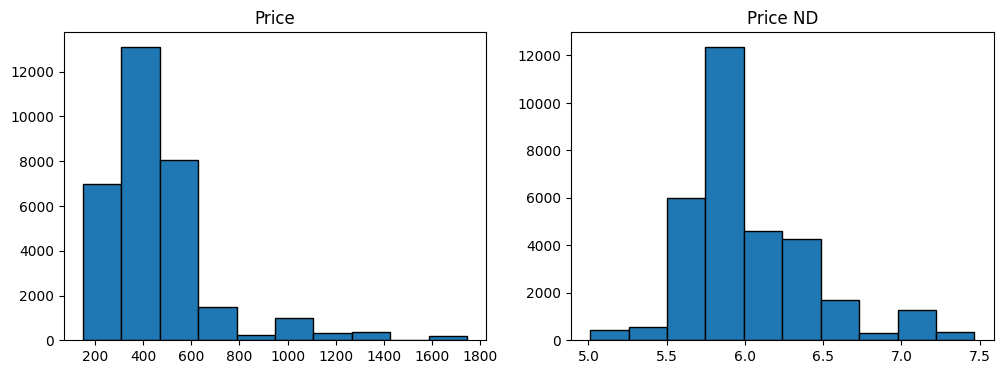

In [18]:
# Price 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].set_title("Price")
ax[0].hist(df['PRICE'], edgecolor='black')

# right skew -> log function transformer -> normal distubution
log_transformer = FunctionTransformer(func=np.log1p)
Price_ND = log_transformer.fit_transform(df['PRICE'])
ax[1].set_title("Price ND")
ax[1].hist(Price_ND, edgecolor='black')

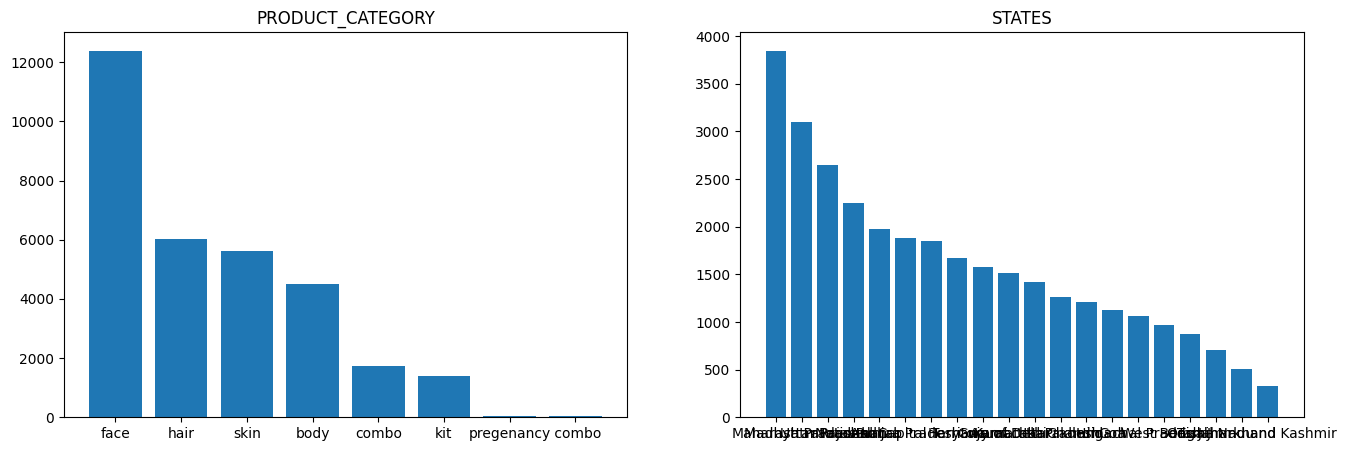

In [19]:
# Product Category, Pack SIze, States
bar_ploting_cols = ['PRODUCT_CATEGORY', 'STATES']
cols = len(bar_ploting_cols)
rows = len(bar_ploting_cols) % cols

fig, axes = plt.subplots(rows+1, cols, figsize=(16,5))
for index,ax in enumerate(axes.flatten()):
    ax.set_title(bar_ploting_cols[index])
    ax.bar(height = df[bar_ploting_cols[index]].value_counts().reset_index()['count'],
          x = df[bar_ploting_cols[index]].value_counts().reset_index()[bar_ploting_cols[index]])

<BarContainer object of 8 artists>

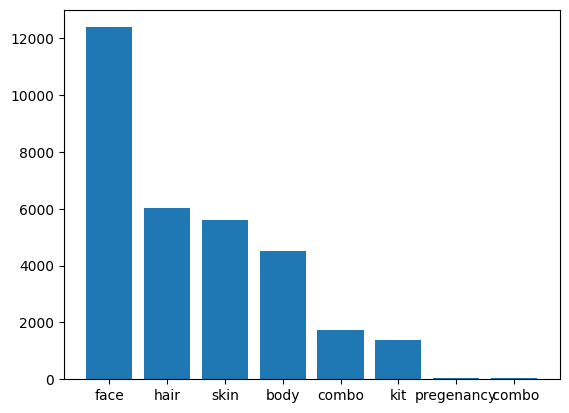

In [20]:
plt.bar(height=df['PRODUCT_CATEGORY'].value_counts().reset_index()['count'], x=df['PRODUCT_CATEGORY'].value_counts().reset_index()['PRODUCT_CATEGORY'])

In [21]:
df['PRODUCT_CATEGORY'].value_counts().apply(lambda x: x/df.shape[0]).reset_index()

,PRODUCT_CATEGORY,count
0,face,0.390047
1,hair,0.189877
2,skin,0.176750
3,body,0.141683
4,combo,0.054929
5,kit,0.043881
6,pregenancy,0.001700
7,combo,0.001133


In [22]:
df['STATES'].value_counts().apply(lambda x: x/df.shape[0]).reset_index()

,STATES,count
0,Maharashtra,0.121160
1,Madhya Pradesh,0.097708
2,Uttar Pradesh,0.083197
3,Rajasthan,0.070669
4,Punjab,0.062201
5,Andhra Pradesh,0.059179
6,National Capital Territory of Delhi,0.058109
7,Haryana,0.052695
8,Gujarat,0.049515
9,Karnataka,0.047564


In [23]:
df.sample(5)

,SKU,PRICE,PRODUCT_CATEGORY,PACK_SIZE,REVIEW_COUNT,REVIEW_DATE,REVIEW_TIME,DATE_OF_CREATION,LAST_UPDATED_DATE,STATES
3041,8906087777892,599,face,30ml,72,2022-06-19,2024-05-19 06:15:25,2022-01-31,2022-09-14,Uttar Pradesh
7474,8906087776123,399,skin,400ml,92,2021-09-29,2024-05-19 10:15:05,2021-06-25,2022-09-19,Odisha
26239,8906087771944,471,face,30ml,615,2021-03-15,2024-05-19 11:43:44,2021-03-25,2022-09-12,National Capital Territory of Delhi
27485,8906087771333,499,body,80ml,306,2021-06-11,2024-05-19 19:15:02,2021-03-25,2022-09-20,Andhra Pradesh
19247,8906087772545,399,hair,200ml,66,2021-05-26,2024-05-19 09:28:22,2021-03-25,2022-09-12,Haryana


In [24]:
# # Bivarient and Multivarient analysis
# a. N - N -> Scatterplot
# b. N - C
# c. C - C

# a. N-N
# 1.Price - Review Count

# b. N-C
# 1. PRICE - Product_category
# 2. PRICE - PACK_size
# 3. PRICE - STATES

# c. C-C
# 1. Product Category - Pack Size
# 2. Product Category - States
# 3. States - Pack size

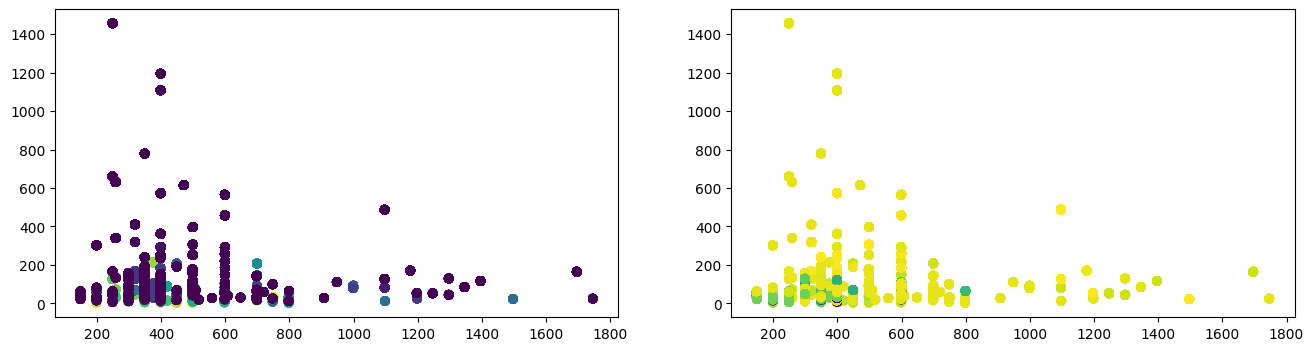

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
axes[0].scatter(x=df['PRICE'], y=df['REVIEW_COUNT'], c=df['DATE_OF_CREATION'])
axes[1].scatter(x=df['PRICE'], y=df['REVIEW_COUNT'], c=df['LAST_UPDATED_DATE'])

In [26]:
# fig, axes = plt.subplots(1, 2, figsize=(16,4))
# axes[0].bar(x=df['PRICE'], height=df['PRODUCT_CATEGORY'])
# axes[1].bar(x=df['REVIEW_COUNT'], height=df['PRODUCT_CATEGORY'])

<Axes: title={'center': 'Review Count vs PRODUCT_CATEGORY'}, xlabel='PRODUCT_CATEGORY', ylabel='REVIEW_COUNT'>

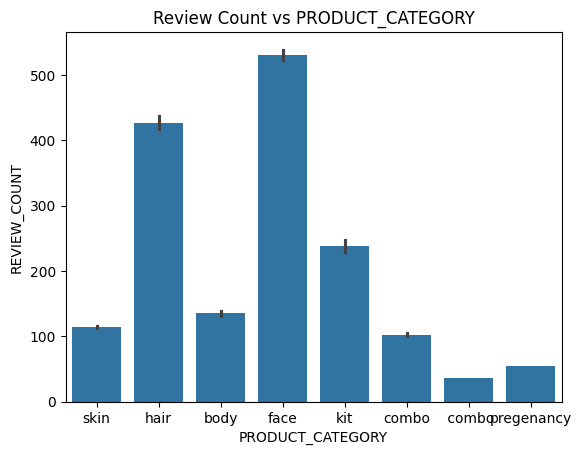

In [27]:
plt.title("Review Count vs PRODUCT_CATEGORY")
sns.barplot(y=df['REVIEW_COUNT'], x=df['PRODUCT_CATEGORY'])

<Axes: title={'center': 'Product Category vs Pack Size'}, xlabel='PACK_SIZE', ylabel='PRODUCT_CATEGORY'>

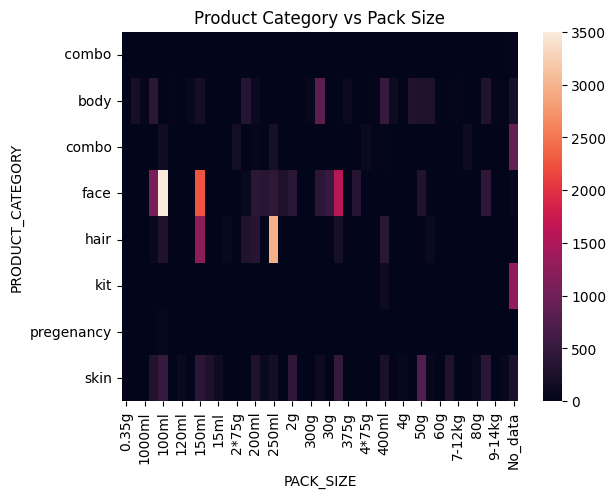

In [28]:
plt.title("Product Category vs Pack Size")
sns.heatmap(pd.crosstab(df['PRODUCT_CATEGORY'], df['PACK_SIZE']))

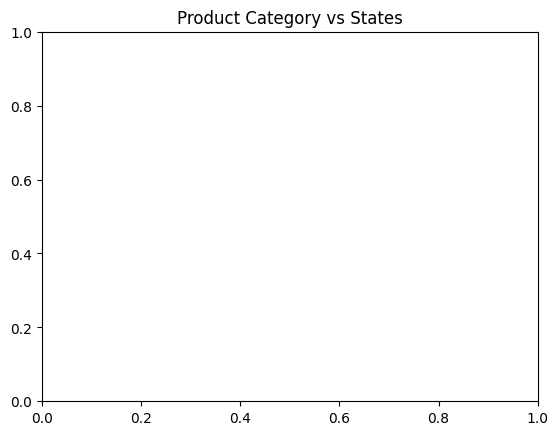

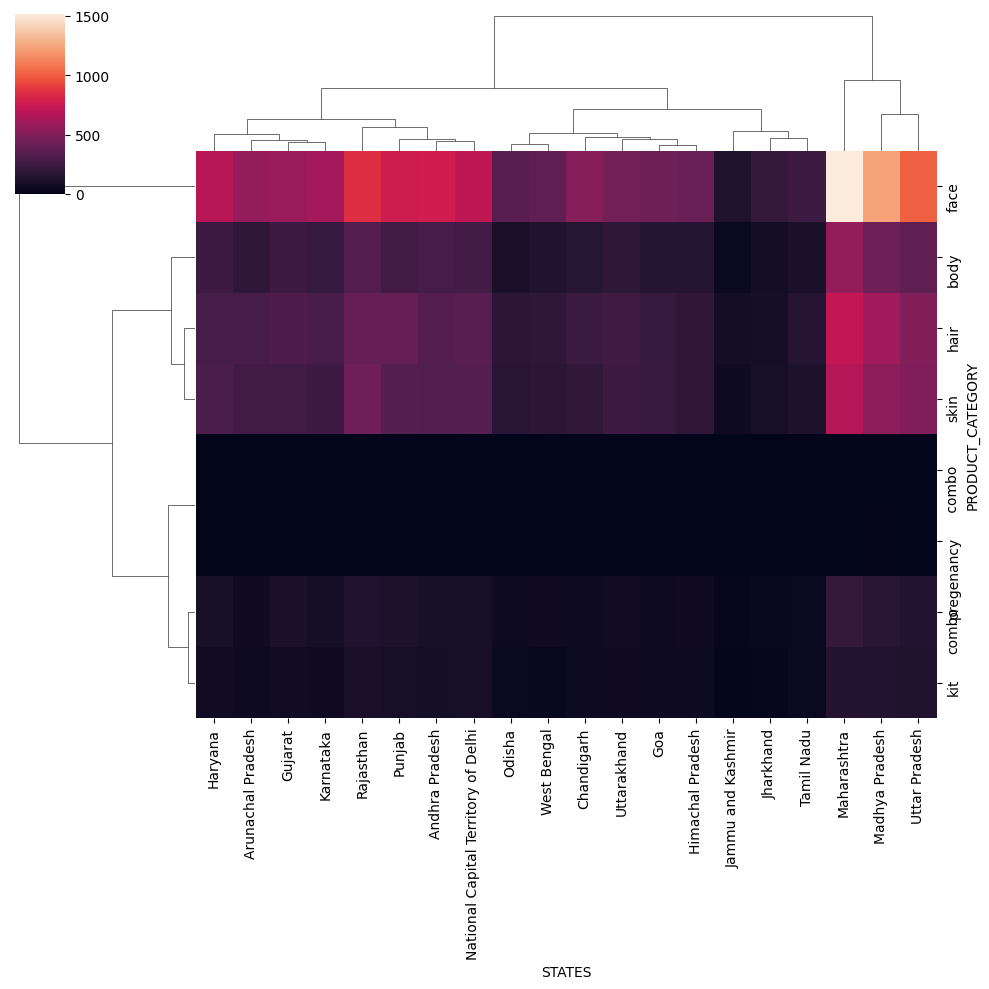

In [29]:
plt.title("Product Category vs States")
sns.clustermap(pd.crosstab(df['PRODUCT_CATEGORY'], df['STATES']))

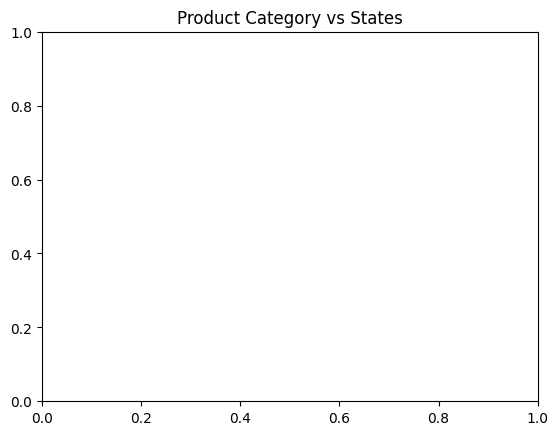

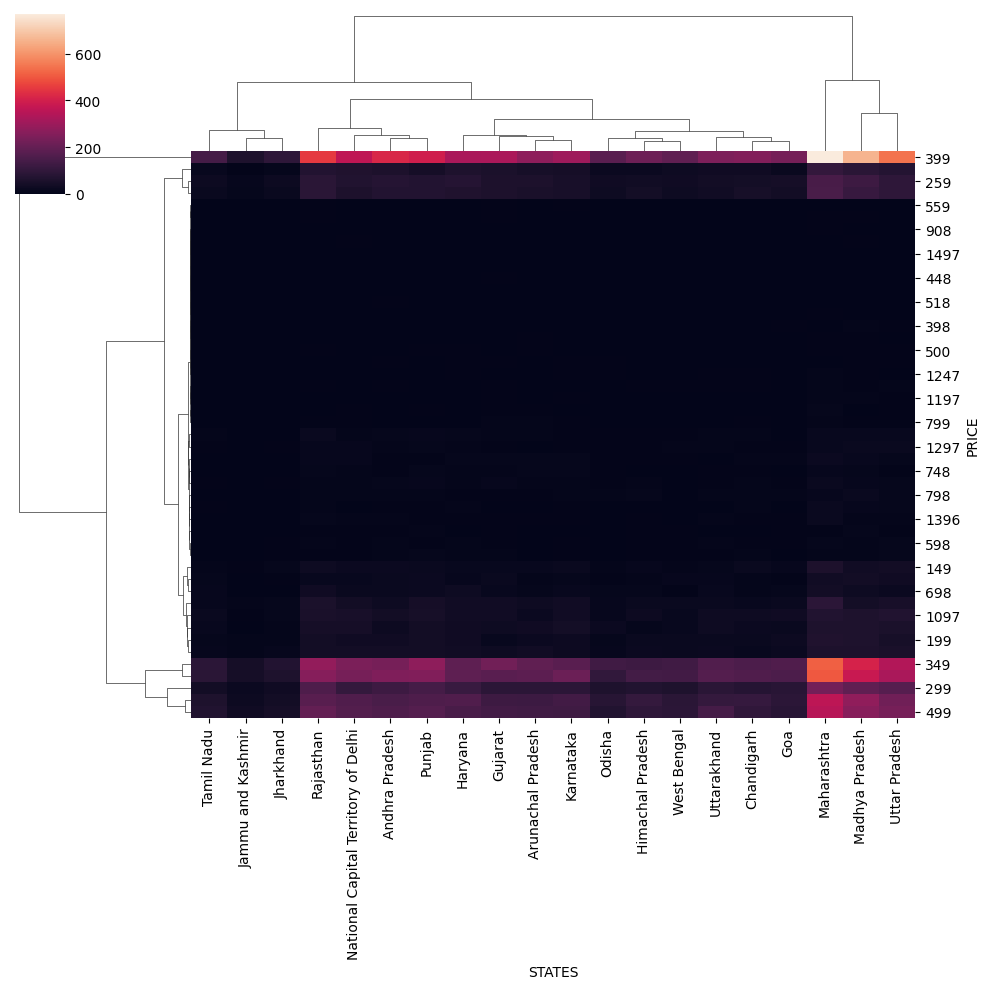

In [30]:
plt.title("Product Category vs States")
sns.clustermap(pd.crosstab(df['PRICE'], df['STATES']))

In [31]:
df.head()

,SKU,PRICE,PRODUCT_CATEGORY,PACK_SIZE,REVIEW_COUNT,REVIEW_DATE,REVIEW_TIME,DATE_OF_CREATION,LAST_UPDATED_DATE,STATES
0,8904417303377,498,skin,80g,2,2022-09-13,2024-05-19 18:33:56,2022-09-01,2022-09-12,Madhya Pradesh
1,8904417303377,498,skin,80g,2,2022-09-12,2024-05-19 09:44:31,2022-09-01,2022-09-12,Gujarat
2,8904417302318,399,skin,60g,7,2022-09-18,2024-05-19 12:02:53,2022-08-29,2022-09-10,Andhra Pradesh
3,8904417302318,399,skin,60g,7,2022-09-17,2024-05-19 17:56:30,2022-08-29,2022-09-10,Rajasthan
4,8904417302318,399,skin,60g,7,2022-09-17,2024-05-19 17:56:30,2022-08-29,2022-09-10,Himachal Pradesh


(array([  968.,   734.,   887.,  2080.,   638.,   878.,   118.,   821.,
        22954.,  1690.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

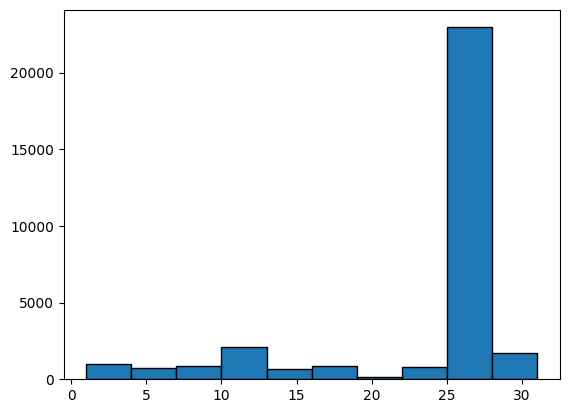

In [32]:
plt.hist(df['DATE_OF_CREATION'].dt.day, edgecolor='black')

<Axes: xlabel='REVIEW_DATE'>

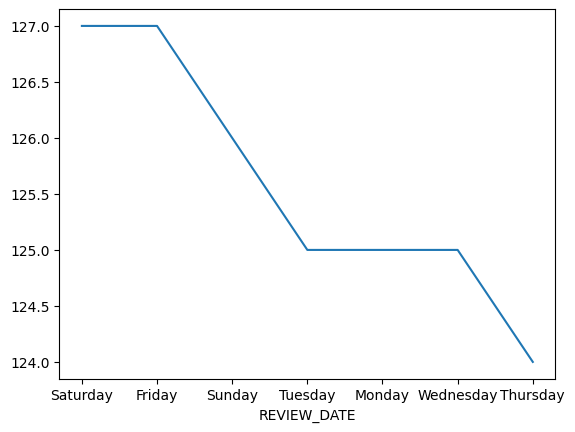

In [33]:
df['REVIEW_DATE'].drop_duplicates().dt.day_name().value_counts().plot(kind='line')

<Axes: xlabel='STATES'>

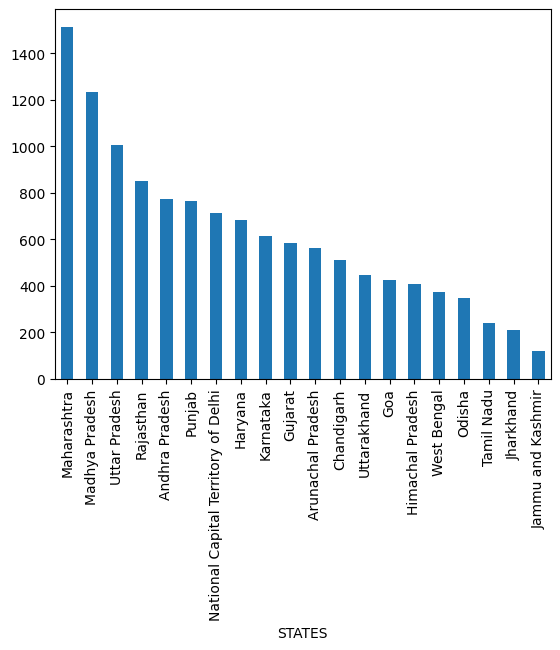

In [34]:
df[df['PRODUCT_CATEGORY'] == "face"]['STATES'].value_counts().plot(kind='bar')

In [35]:
# Maharashtra

<Axes: xlabel='REVIEW_DATE'>

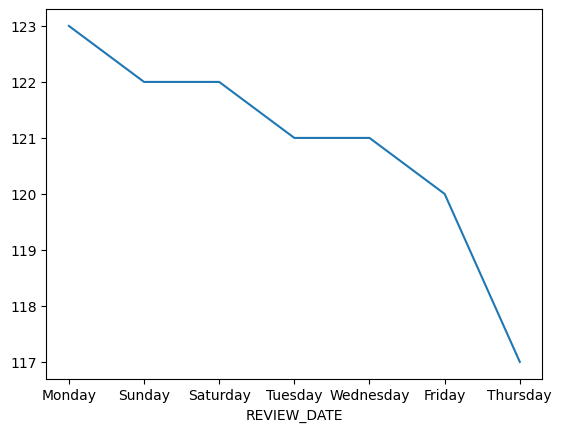

In [36]:
df[df['PRODUCT_CATEGORY'] == 'face']['REVIEW_DATE'].drop_duplicates().dt.day_name().value_counts().plot(kind='line')

In [37]:
# Creating DataFrame for Model Training
from sklearn.model_selection import train_test_split

In [38]:
working_df = df[['SKU','PRICE','PRODUCT_CATEGORY','PACK_SIZE']].drop_duplicates().reset_index(drop=True)
working_df.shape

(319, 4)

In [39]:
working_df.sample(5)

,SKU,PRICE,PRODUCT_CATEGORY,PACK_SIZE
270,8906087772187,499,hair,400ml
161,8906087775553,349,skin,200ml
254,8906087772828,798,combo,400ml
89,8906087778097,798,kit,400ml
261,8906087772484,399,face,200ml


In [40]:
working_df.isnull().sum()

SKU                 0
PRICE               0
PRODUCT_CATEGORY    0
PACK_SIZE           0
dtype: int64

In [41]:
working_df = pd.merge(working_df, pd.crosstab(df['SKU'], df['STATES']).reset_index(), on='SKU', how='outer')

In [42]:
working_df['SALES'] = df.groupby('SKU')['SKU'].count().values

In [43]:
working_df.head(5)

,SKU,PRICE,PRODUCT_CATEGORY,PACK_SIZE,Andhra Pradesh,Arunachal Pradesh,Chandigarh,Goa,Gujarat,Haryana,...,Maharashtra,National Capital Territory of Delhi,Odisha,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttarakhand,West Bengal,SALES
0,8904417303377,498,skin,80g,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,59
1,8904417302318,399,skin,60g,1,0,0,0,0,0,...,2,0,0,0,2,0,0,0,0,50
2,8904417302301,399,skin,60g,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,214
3,8904417301762,249,skin,80g,2,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,4
4,8904417300338,399,skin,100ml,4,1,2,1,1,3,...,8,2,1,1,4,0,5,3,2,8


<Axes: >

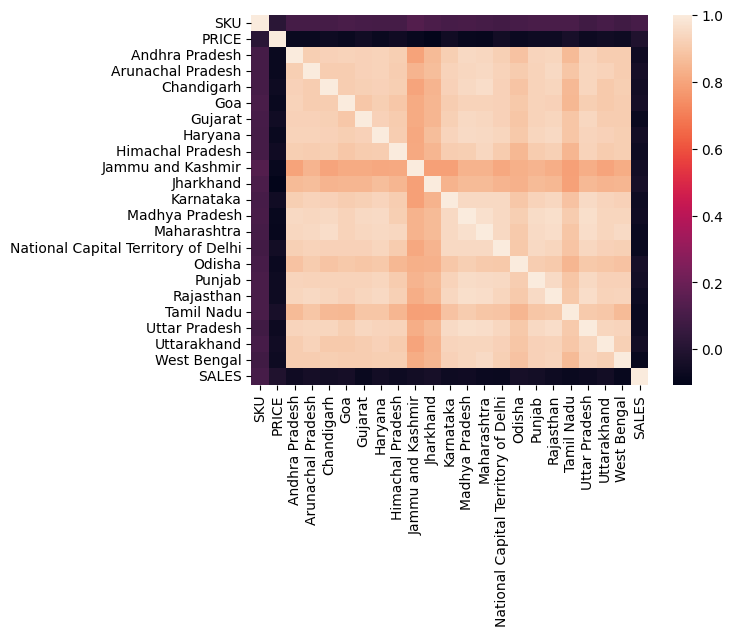

In [44]:
sns.heatmap(working_df.drop(columns=['PRODUCT_CATEGORY', 'PACK_SIZE']).corr())

In [45]:
# Splitting Data into X, y

In [46]:
X = working_df.iloc[:, 1:working_df.shape[1]-1].values
y = working_df.iloc[:, -1].values

In [47]:
X[0:5]

array([[498, 'skin', '80g', 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [399, 'skin', '60g', 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0,
        2, 0, 0, 0, 0],
       [399, 'skin', '60g', 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0],
       [249, 'skin', '80g', 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [399, 'skin', '100ml', 4, 1, 2, 1, 1, 3, 3, 0, 0, 3, 6, 8, 2, 1,
        1, 4, 0, 5, 3, 2]], dtype=object)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [49]:
# Creating Column Transformers
X_train[0:5]

array([[599, 'face', '100g', 18, 12, 13, 15, 13, 16, 8, 1, 3, 12, 25, 30,
        19, 4, 15, 15, 7, 14, 10, 8],
       [499, 'face', '2g', 3, 6, 2, 3, 4, 0, 0, 2, 2, 1, 2, 4, 5, 2, 2,
        4, 0, 1, 0, 0],
       [349, 'hair', '30ml', 6, 6, 0, 3, 3, 3, 0, 1, 2, 6, 3, 5, 2, 1, 1,
        5, 1, 4, 2, 1],
       [599, 'skin', '100ml', 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0,
        1, 0, 0, 0, 0, 0],
       [648, 'combo', 'No_data', 2, 1, 1, 0, 4, 3, 0, 0, 0, 2, 4, 5, 1,
        0, 0, 6, 0, 2, 0, 0]], dtype=object)

In [50]:
X_train.shape

(255, 23)

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error
def evaluation(model, X, y):
    y_pred = model.predict(X)
    return {
        "r2_score": r2_score(y, y_pred),
        "mae" : mean_absolute_error(y, y_pred)
    }

In [52]:
# One Hot Encode Transformer
from sklearn.preprocessing import OneHotEncoder
ohe_states_col = OneHotEncoder(dtype=np.int32, sparse=False)

In [53]:
ohe_transformer = ColumnTransformer(
    transformers=[
        ("category and size", OneHotEncoder(dtype=np.int32, handle_unknown='ignore', sparse_output=True) , [1,2])
    ],
    remainder='passthrough'
)

In [54]:
ohe_transformer.fit_transform(X_train)[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 599, 18, 12, 13, 15, 13, 16, 8, 1, 3, 12, 25, 30, 19, 4, 15,
       15, 7, 14, 10, 8], dtype=object)

In [55]:
# models

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [196]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=5)
rf = RandomForestRegressor(n_estimators=100)
svr = SVR()

model = dt
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [197]:
# Pipelines
# 1. Preprocessing Pipeline
# 2. Model Pipeline

from sklearn.pipeline import Pipeline

In [198]:
# 2. Model PipleLine
model_pipe = Pipeline(
    [
        ("ohe -> category, size", ohe_transformer),
        ("model", model)
    ]
)

In [199]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ohe -> category, size',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category and size',
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore'),
                                                  [1, 2])])),
                ('model', DecisionTreeRegressor(max_depth=5))])

In [200]:
# Evaluation
evaluation(model_pipe, X_test, y_test)

{'r2_score': -0.03582347800952035, 'mae': 57.38339757709251}

In [220]:
# Cross Validation
from sklearn.model_selection import cross_validate
cross_validate(estimator=model_pipe, X=X, y=y, scoring='r2', cv=10)['test_score']

array([-14.73475314,  -0.22920966,  -0.29720136,   0.46567638,
        -0.21537099,  -0.1109145 ,  -0.06244816,  -0.03427674,
       -14.23949434,  -2.28248934])

In [139]:
ohe_state = ColumnTransformer(
    transformers=[
        ("OHE State Columns", OneHotEncoder(dtype=np.int32,handle_unknown='ignore', sparse_output=False) , [-1])
    ],
    remainder='passthrough'
)

In [140]:
ohe_state.fit_transform(df['STATES'].values.reshape(-1,1))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [141]:
ohe_state.transform([["Jammu and Kashmir"]])

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

In [147]:
model_pipe.predict(np.append([399, 'face', '80g'], ohe_state.transform([['Maharashtra']])).reshape(-1,23))

array([340.66666667])

In [143]:
ohe_state.transform([["Jammu and Kashmir"]])

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

In [158]:
d = working_df[['SKU','PRICE','PRODUCT_CATEGORY','PACK_SIZE','SALES']]

In [159]:
d.sample(5)

,SKU,PRICE,PRODUCT_CATEGORY,PACK_SIZE,SALES
114,8906087776857,399,skin,400ml,127
258,8906087772491,599,hair,250ml,41
29,8906087779247,599,skin,30ml,71
28,8906087778790,299,skin,120ml,60
84,8906087778158,419,face,30g,237


<Axes: xlabel='PRICE', ylabel='SALES'>

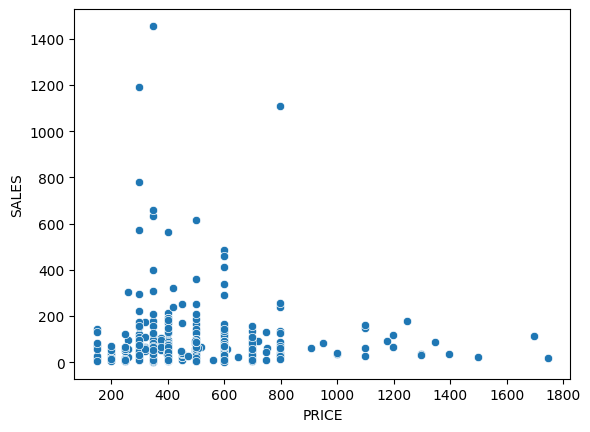

In [170]:
sns.scatterplot(x=d['PRICE'], y=d['SALES'])

<Axes: ylabel='Density'>

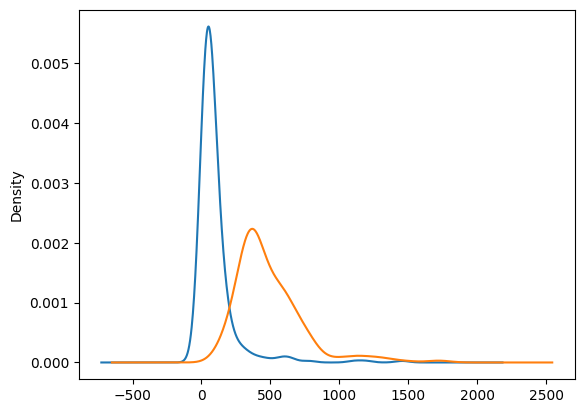

In [176]:
d['SALES'].plot(kind='kde')
d['PRICE'].plot(kind='kde')